In [1]:
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np

from tqdm import tqdm

In [2]:
import severability

In [3]:
# creating directed partitioned graph
G = nx.planted_partition_graph(4, 10, 0.3, 0.01, seed=42, directed=True)
A = nx.to_numpy_array(G)
P = severability.transition_matrix(A)

In [4]:
np.sum(P,axis=0)

array([1.        , 0.4       , 1.66666667, 2.        , 1.        ,
       0.2       , 2.        , 1.        , 3.        , 0.5       ,
       1.25      , 0.5       , 2.        , 0.66666667, 1.66666667,
       1.5       , 1.        , 0.75      , 1.        , 1.        ,
       1.        , 0.        , 1.25      , 0.6       , 1.66666667,
       0.83333333, 0.5       , 1.5       , 0.75      , 0.75      ,
       1.33333333, 0.75      , 2.5       , 0.66666667, 0.5       ,
       1.        , 1.        , 1.5       , 1.        , 1.5       ])

In [5]:
np.sum(P,axis=1)

array([2.03333333, 1.48333333, 0.86666667, 0.25      , 1.56666667,
       1.48333333, 0.53333333, 2.45      , 0.7       , 2.15      ,
       1.36666667, 1.11666667, 0.78333333, 0.91666667, 0.86666667,
       0.66666667, 1.75      , 1.41666667, 1.16666667, 0.95      ,
       1.08333333, 1.08333333, 1.03333333, 1.25      , 0.66666667,
       1.61666667, 0.41666667, 1.08333333, 0.91666667, 1.        ,
       1.33333333, 1.58333333, 0.45      , 1.        , 1.83333333,
       1.        , 0.58333333, 0.83333333, 0.66666667, 0.75      ])

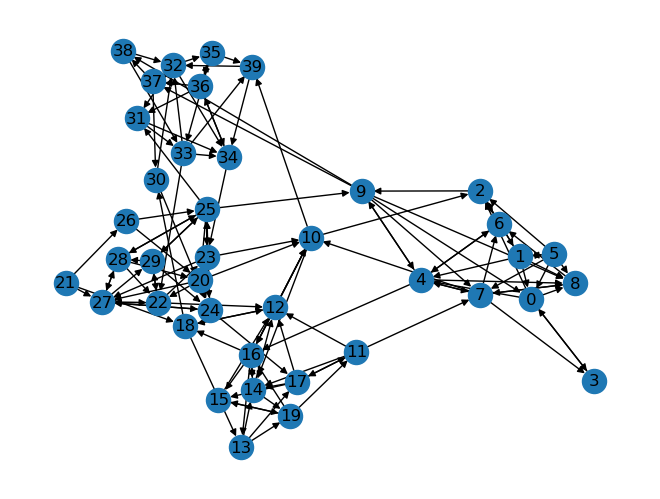

In [6]:
nx.draw(G,with_labels=True)

In [7]:
times = np.arange(1,10,1)
n_communities = np.zeros_like(times)
mean_s_communities = np.zeros_like(times)
max_s_communities = np.zeros_like(times)

for i in tqdm(range(len(times))):
    t = times[i]
    partition = severability.component_cover(P,t=t)
    n_communities[i] = len(partition)
    sizes = np.zeros(len(partition))
    for j in range((len(partition))):
        sizes[j] = len(partition[j][0])
    mean_s_communities[i] = sizes.mean()
    max_s_communities[i] = sizes.max()
    

100%|██████████| 9/9 [00:11<00:00,  1.27s/it]


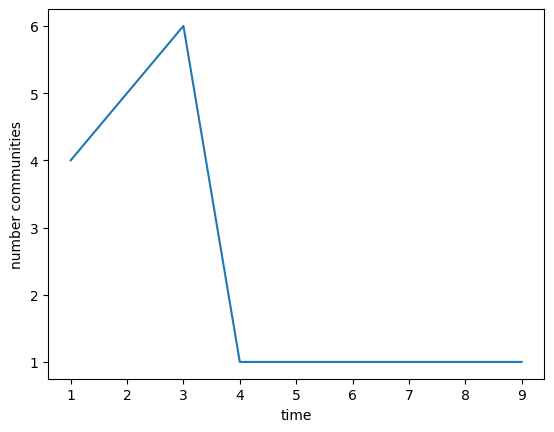

In [8]:
fig, ax = plt.subplots(1)
ax.plot(times,n_communities)
ax.set(xlabel="time", ylabel="number communities")
plt.show()

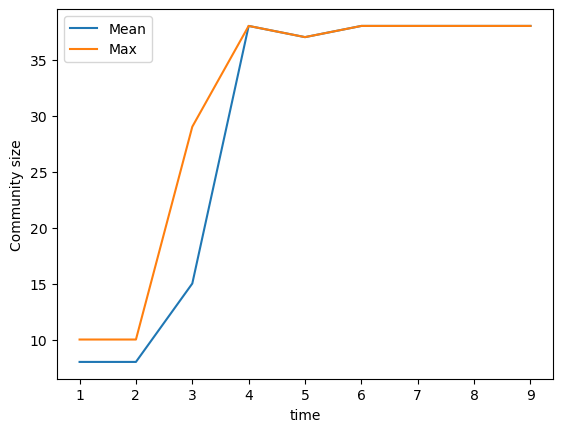

In [9]:
fig, ax = plt.subplots(1)
ax.plot(times,mean_s_communities,label="Mean")
ax.plot(times,max_s_communities,label="Max")
ax.set(xlabel="time", ylabel="Community size")
ax.legend()
plt.show()